# Part 1.

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Question 1.

Slice a zigzag

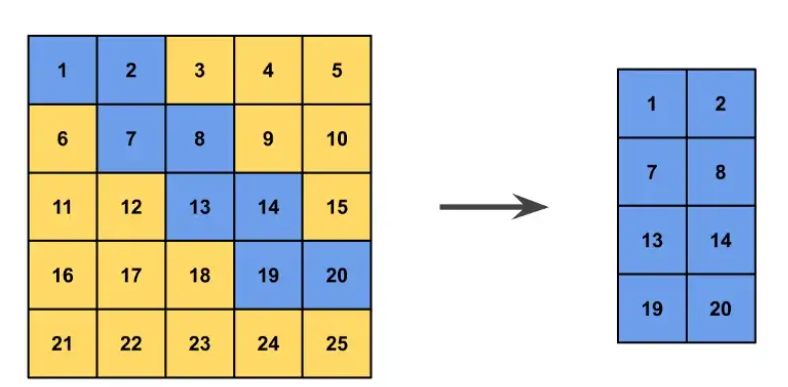

In [41]:
array=np.array(range(1,26))
array=array.reshape(5,5)

np.concatenate((np.diag(array)[:-1], np.diag(array, k=1))).reshape(2,array.shape[0]-1).T

# Alternatively,

# array=np.array(range(1,26))
# array=array.reshape(5,5)

# col1=np.diag(array)
# col1=col1[:-1]

# col2=np.diag(array, k=1)

# answer=np.concatenate((col1,col2)).reshape(2,len(col1)).T
# answer


array([[ 1,  2],
       [ 7,  8],
       [13, 14],
       [19, 20]])

#### Question 2.

string = "apple orange pear pineapple banana"
Using regex, find all words that have at least 1 repeated letter. Our expected output:

[('apple', 'p'), ('pineapple', 'p'), ('banana', 'a')]

In [11]:
import re

string = "apple orange pear pineapple banana"
[(word,re.findall('(\w).*\\1{1,}',word)) for word in string.split()]

# Not exactly the same answer but close :D

[('apple', ['p']),
 ('orange', []),
 ('pear', []),
 ('pineapple', ['p']),
 ('banana', ['a'])]

#### Question 3.

Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:

[(5, 7), (6, 4), (2, 5)

In [210]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
df

,0,1,2,3,4,5,6,7
0,38,38,46,46,13,24,3,54
1,18,47,4,42,8,66,50,46
2,62,36,19,19,77,17,7,63
3,28,47,46,65,63,12,16,24
4,14,51,34,56,29,59,92,79
5,58,76,96,45,38,76,58,40
6,10,34,48,40,37,23,41,26
7,55,70,91,27,79,92,20,31


In [216]:
Nlargest = 3     # Define the number of largest elements you want

# Ravels the df, sorts values in ascending order, puts values in decreasing order and returns the indices of largest 3.
sorted_i = np.argsort(df.values, axis=None)[::-1][:Nlargest]    

# Returns the rows and columns of largest 3 based on df shape.
rows_and_cols = np.unravel_index(sorted_i, df.shape)

# Changes the place of coordinates.
cols_and_rows=[rows_and_cols[1],rows_and_cols[0]]

# Puts the coordinates into respective pairs.
coordinates = list(zip(*cols_and_rows))

print(coordinates)
# My answer is in decreasing order, the largest - first, the smallest - last

[(2, 5), (6, 4), (5, 7)]


#### Question 4.

 DataFrame df that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the column which contains the third NaN value.

You should return a Series of column labels: e, c, d, h, d

In [217]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df2 = pd.DataFrame(data, columns=columns)
df2

,a,b,c,d,e,f,g,h,i,j
0,0.04,NaN,NaN,0.25,NaN,0.43,0.71,0.51,NaN,NaN
1,NaN,NaN,NaN,0.04,0.76,NaN,NaN,0.67,0.76,0.16
2,NaN,NaN,0.50,NaN,0.31,0.40,NaN,NaN,0.24,0.01
3,0.49,NaN,NaN,0.62,0.73,0.26,0.85,NaN,NaN,NaN
4,NaN,NaN,0.41,NaN,0.05,NaN,0.61,NaN,0.48,0.68


In [281]:
[df2.iloc[row].sort_values(axis=0, na_position='first').index[2] for row in df2.index]

['e', 'c', 'd', 'h', 'd']

#### Question 5.

Using BeautifulSoup scrape all mobile phones from all pages in the followink link:

https://kontakt.az/telefonlar/mobil-telefonlar/


In [373]:
import requests
from bs4 import BeautifulSoup
base_link='https://kontakt.az/telefonlar/mobil-telefonlar/'
response=requests.get(base_link)
html=response.content
soup=BeautifulSoup(html,'html.parser')

In [430]:
tel_links=soup.find_all('a',attrs={'draggable':'false','href':True})
main_page=[tel.text.strip('\n').rstrip(' ') for tel in tel_links]

In [422]:
pages_links=[base_link+'page/'+f'{page_nm}'+
 '/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE'
    for page_nm in range(2,9)]

['https://kontakt.az/telefonlar/mobil-telefonlar/page/2/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/3/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/4/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/5/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/6/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/7/?gclid=CjwKCAiAkfucBhBBEiwAFjbkr4UQUN6Tmz0aqehCj0D6GQIo0_7va1fuoVZwK_Gg8ZYow4ADMrc9mhoCzP0QAvD_BwE',
 'https://kontakt.az/telefonlar/mobil-telefonlar/page/8/?g

In [425]:
def all_phones(pages_list):
    list99=[]
    for page in pages_list:
        resp=requests.get(page)
        html_=resp.content
        soup_=BeautifulSoup(html_,'html.parser')
        lnks=soup_.find_all('a',attrs={'draggable':'false','href':True})
        list99.append([tel.text.strip('\n').rstrip(' ') for tel in tel_links])
    return list99

In [427]:
results=all_phones(pages_links)
results.append(main_page)

total_result=[]

for item in results:
    for item2 in item:
        total_result.append(item2)
print(len(total_result)) 

total_result
# The length 384 is equal to 8*48 which means that all phones from all 8 pages have been scrapped.

#### Question 6.

In [282]:
df3 = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)
df3

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [283]:
# YOUR CODE

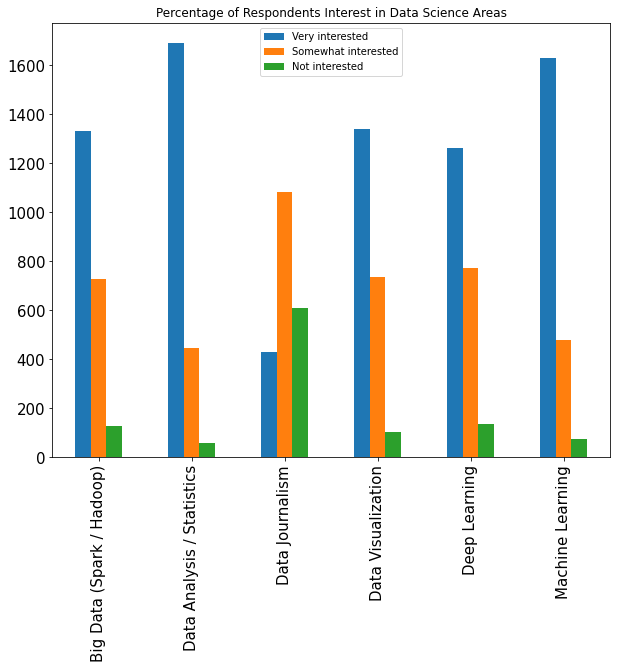

In [437]:
my_plot=df3.plot(figsize=(10,8) ,kind='bar',title=
                 'Percentage of Respondents Interest in Data Science Areas',fontsize=15)
my_plot.legend(loc='best')
plt.show()

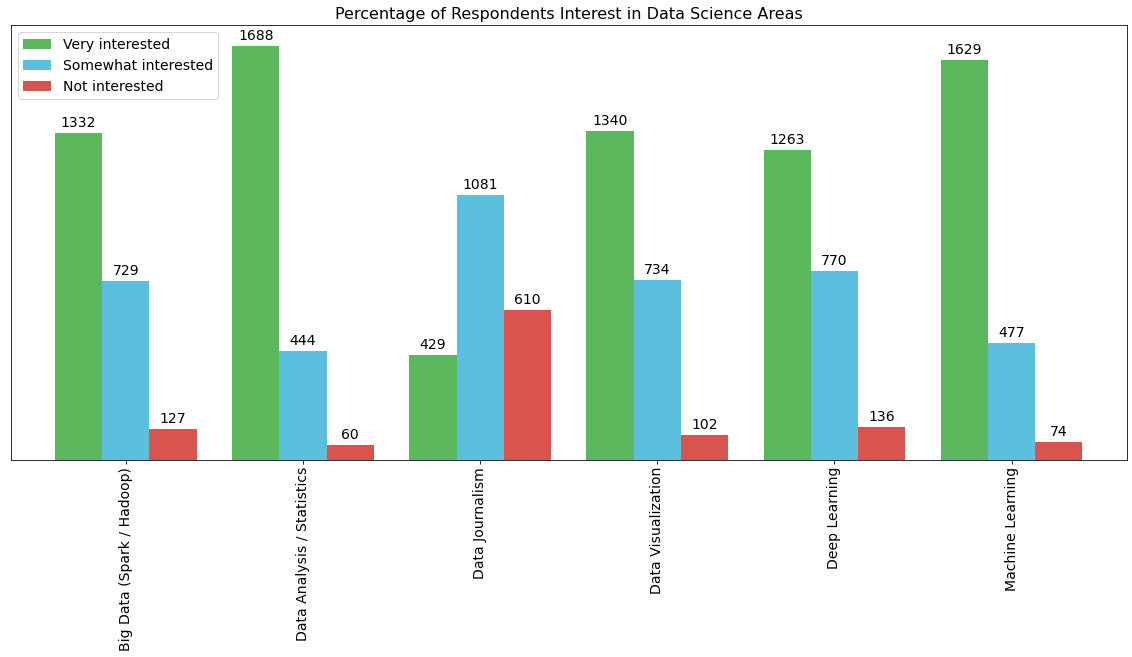

### Data Analysis - Part 2.

Introduction:

Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [2]:
# Dataset link
movies=pd.read_csv('https://raw.githubusercontent.com/CICIFLY/Data-Analytics-Projects/master/Data%20Analytics%20with%20Movie%20Data/tmdb-movies.csv')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The questions about this dataset:
 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

 2. Will the runtime affect the vote count and popularity?

 3. Higher popularity means higher profits ?

 4. What Features are Associate with Top 10 Revenue Movies ?

 5. Which genres are most popular from year to year?

<AxesSubplot:xlabel='budget', ylabel='popularity'>

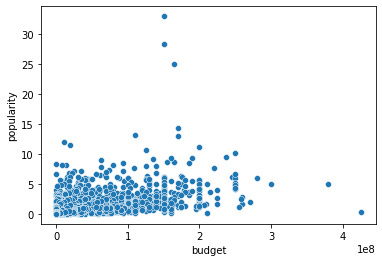

In [6]:
sns.scatterplot(x=movies['budget'],y=movies['popularity'])

In [13]:
movies[['budget','popularity']].corr()

,budget,popularity
budget,1.000000,0.545472
popularity,0.545472,1.000000


In [14]:
# 1. From the scatterplot above, we can see that higher budget does not mean higher popularity.
# The correlation is weak to moderate between budget and popularity.

In [15]:
movies[['runtime','vote_count','popularity']]

,runtime,vote_count,popularity
0,124,5562,32.985763
1,120,6185,28.419936
2,119,2480,13.112507
3,136,5292,11.173104
4,137,2947,9.335014
...,...,...,...
10861,95,11,0.080598
10862,176,20,0.065543
10863,94,11,0.065141
10864,80,22,0.064317


<AxesSubplot:xlabel='runtime', ylabel='popularity'>

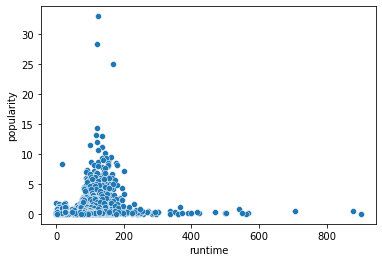

In [16]:
sns.scatterplot(x=movies['runtime'],y=movies['popularity'])

<AxesSubplot:xlabel='runtime', ylabel='vote_count'>

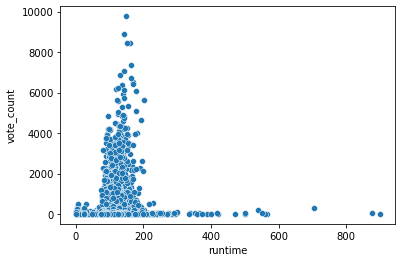

In [17]:
sns.scatterplot(x=movies['runtime'],y=movies['vote_count'])

In [18]:
movies[['runtime','vote_count','popularity']].corr()

,runtime,vote_count,popularity
runtime,1.000000,0.163278,0.139033
vote_count,0.163278,1.000000,0.800828
popularity,0.139033,0.800828,1.000000


In [19]:
# 2. Runtime will almost not affect the vote count and popularity.

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

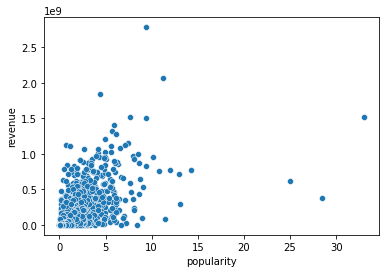

In [24]:
sns.scatterplot(y=movies['revenue'], x=movies['popularity'])

In [27]:
movies[['revenue','popularity']].corr()

,revenue,popularity
revenue,1.000000,0.663358
popularity,0.663358,1.000000


In [28]:
# 3. Higher popularity somehow affects the revenue positively and there is a moderate correlation between them. 
# So, moderately, yes.

In [31]:
movies.sort_values(by='revenue', ascending=False)[:11]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09


In [32]:
# 4. They have high budget and high revenue, have very popular and professional cast,
# mostly of adventure, action and sci-fi genres, produced by very high-quality production companies,
# released mostly between 2012 and 2015, have moderate (not so high) average vote rating. 

In [80]:
m2=movies[['genres','release_year']]

<AxesSubplot:xlabel='release_year', ylabel='Count'>

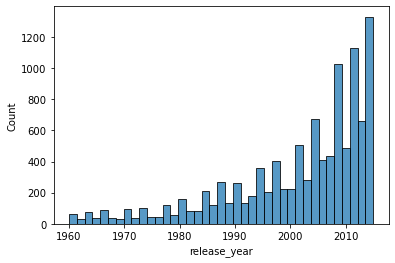

In [83]:
sns.histplot(data=m2['release_year'])

In [92]:
m2.groupby(by='genres').count()

,release_year
genres,
Action,63
Action|Adventure,15
Action|Adventure|Animation,4
Action|Adventure|Animation|Comedy|Drama,1
Action|Adventure|Animation|Comedy|Family,1
...,...
Western|Drama|Crime|Romance,1
Western|History,1
Western|History|War,1


In [ ]:
# 5. There are more action and adventure|action movies.